We've seen that we can identify different authors by their writing style. In this lab, we'll use a method called *unmasking* to see how robust these methods are. If the model is finding shallow or trivial patterns, then prediction accuracy will quickly decline as we prune important features. But if the model is finding deep and robust patterns, then the prediction accuracy will stay strong. Today, we'll find out!

Let's start by getting our environment ready.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join(".", "data")
print("Done!")

Done!


Our data will be chapter-size chunks from books written by 19th-century authors. The basic process of unmasking is to train a linear text classifier. This means that we can inspect the feature weights. We then remove the most important features and try again. The faster accuracy degrades, the less robust the results are. This classification could take awhile, so we're going to load the results from pre-run models.

We have two sets of experiments here: the main data is from 24 19th-century authors. But the baseline data is from just one author, Jane Abbott. We'll classify different books from the same author; we expect authorship analysis to not work as well here, because it's the same author. And so that is our baseline: how quickly does performance decline?

In [2]:
file = os.path.join(ai.data_dir, "authorship.csv")
authorship_df = pd.read_csv(file)
authorship_df.loc[:,"Type"] = "Actual"

file = os.path.join(ai.data_dir, "authorship_baseline.csv")
baseline_df = pd.read_csv(file)
baseline_df.loc[:,"Type"] = "Baseline"

print(baseline_df)
print(authorship_df)

    Cycle  Generation  N_Features  Precision  Recall  F-Score  Support  \
0       1        1850       10095       0.58    0.59     0.58       93   
1       2        1850       10048       0.48    0.48     0.46       93   
2       3        1850        9992       0.38    0.42     0.39       93   
3       4        1850        9934       0.27    0.30     0.26       93   
4       5        1850        9885       0.23    0.27     0.24       93   
5       6        1850        9842       0.22    0.26     0.23       93   
6       7        1850        9814       0.22    0.26     0.21       93   
7       8        1850        9799       0.14    0.16     0.12       93   
8       9        1850        9790       0.00    0.05     0.01       93   
9      10        1850        9788       0.00    0.05     0.01       93   
10     11        1850        9786       0.00    0.05     0.01       93   
11     12        1850        9785       0.00    0.05     0.01       93   
12     13        1850        9784     

We're not running the full classifications, because that would take awhile (we'd need 100 different models). Instead we're going to manipulate this dataframe of results to get what we need.

Let's make a dataframe that contains the actual f-score and the baseline f-score.

In [3]:
results_df = pd.concat([authorship_df, baseline_df], axis=0)
print(results_df)

    Cycle  Generation  N_Features  Precision  Recall  F-Score  Support  \
0       1        1850       10095       0.99    0.99     0.99     1600   
1       2        1850       10075       0.99    0.98     0.99     1600   
2       3        1850       10053       0.98    0.98     0.98     1600   
3       4        1850       10031       0.97    0.97     0.97     1600   
4       5        1850       10011       0.97    0.97     0.97     1600   
..    ...         ...         ...        ...     ...      ...      ...   
35     16        1800        9779       0.00    0.02     0.00       93   
36     17        1800        9778       0.00    0.02     0.00       93   
37     18        1800        9777       0.00    0.02     0.00       93   
38     19        1800        9776       0.00    0.02     0.00       93   
39     20        1800        9775       0.00    0.02     0.00       93   

        Type  
0     Actual  
1     Actual  
2     Actual  
3     Actual  
4     Actual  
..       ...  
35  Ba

So, what does this dataframe tell us? We are doing the same task for 100 different cycles: classifying authors. Each cycle we remove the best features, so we expect the prediction accuracy (f-score) to go down over time. The *Baseline* is a set-up task in which we try to separate samples from the same author. Because it is the same writer, we expect to see a big difference. 

Let's take a look.

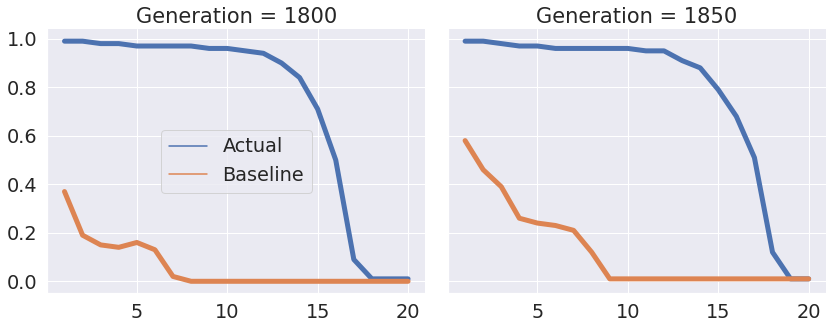

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.75)

g = sns.FacetGrid(results_df, col = "Generation", height=5, aspect = 1.2, legend_out=False)
g.map_dataframe(sns.lineplot, x="Cycle", y="F-Score", hue="Type", linewidth=5)
g.add_legend()